### ML Project on video games sales Data

In [1]:
#Lets Import some libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

## Alongside the fields: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, we have:-

### Critic_score - Aggregate score compiled by Metacritic staff
### Critic_count - The number of critics used in coming up with the Critic_score
### User_score - Score by Metacritic's subscribers
### User_count - Number of users who gave the user_score
### Developer - Party responsible for creating the game
### Rating - The ESRB rating

# Inspecting and Loading the Data

In [2]:
# lets Read Our data
data = pd.read_csv('data//Video_Games_Sales.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [4]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


# EDA and Data Preprocessing

In [6]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
# For numerical columns, fill missing values with the mean
numerical_columns = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# For categorical columns, fill missing values with the mode
categorical_columns = ['Developer', 'Publisher', 'Rating']

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify if there are any null values left
print(data.isnull().sum())

Name               2
Platform           0
Year_of_Release    0
Genre              2
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [8]:
data.shape

(16719, 16)

In [9]:
df= data.dropna(axis=0)

In [10]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [11]:
df.shape

(16717, 16)

In [12]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000
mean,2006.488969,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,7.125046,162.229908
std,5.829987,0.813475,0.503303,0.308836,0.186721,1.547956,9.723998,13.241794,1.010693,378.187754
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,68.967679,22.000000,7.125046,30.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.967679,26.360821,7.125046,162.229908
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.360821,7.300000,162.229908
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


# Visualization And Adjusting The Skewness

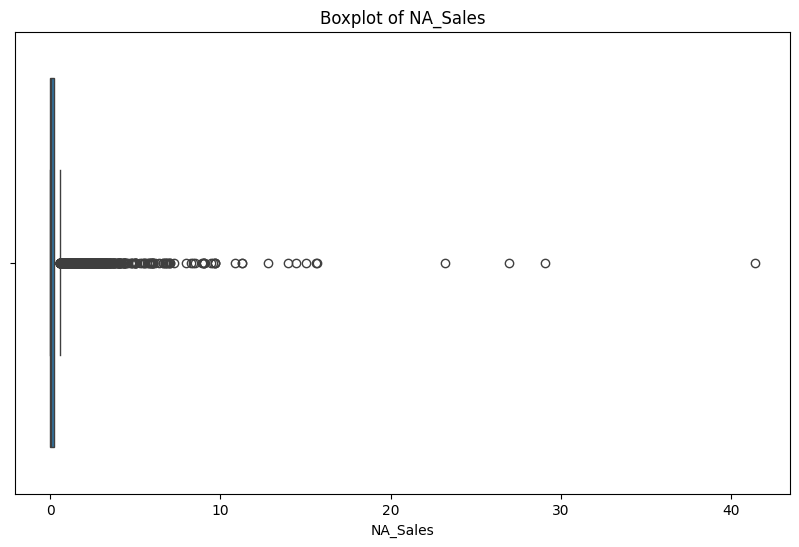

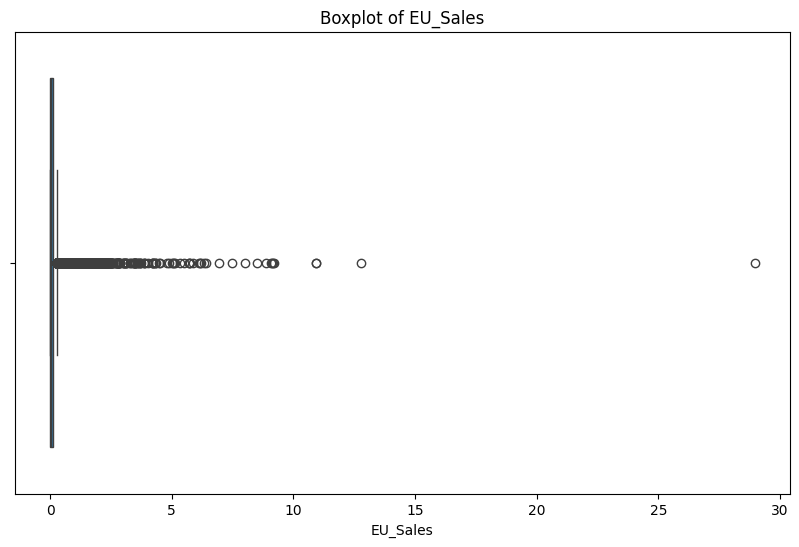

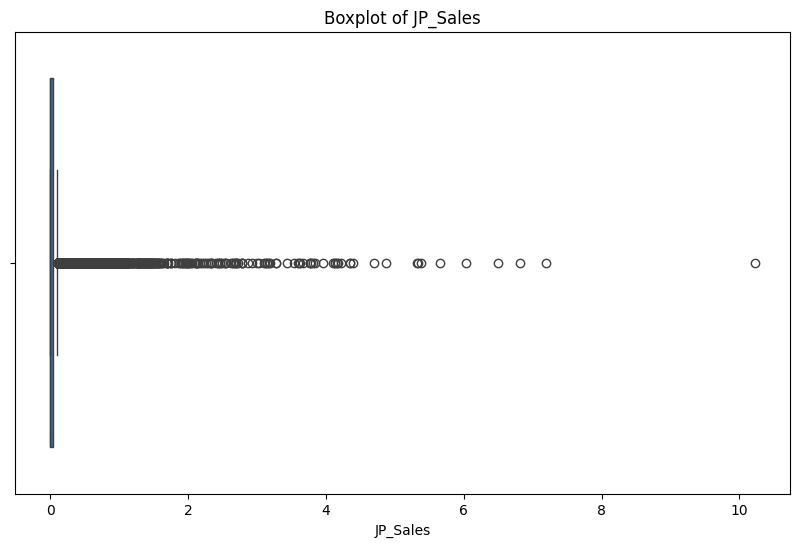

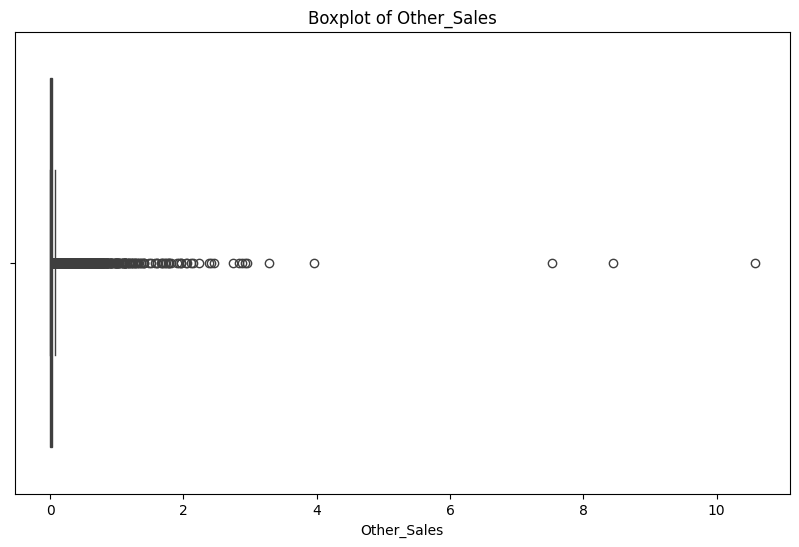

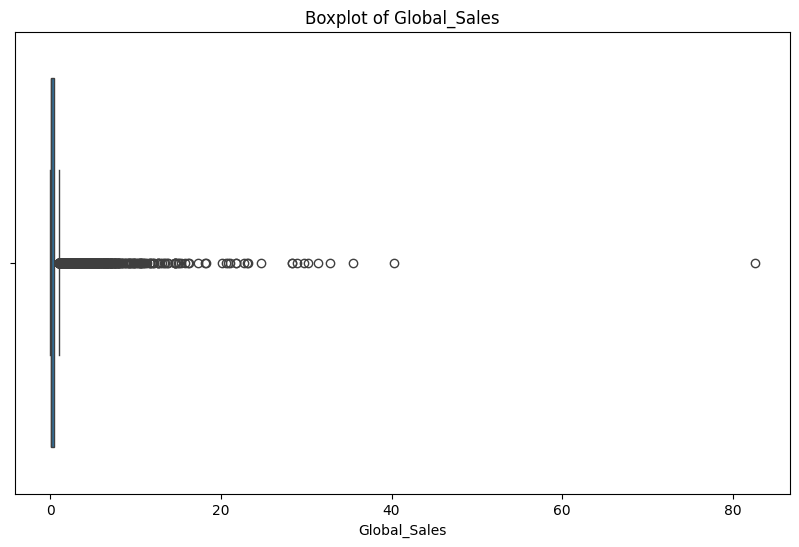

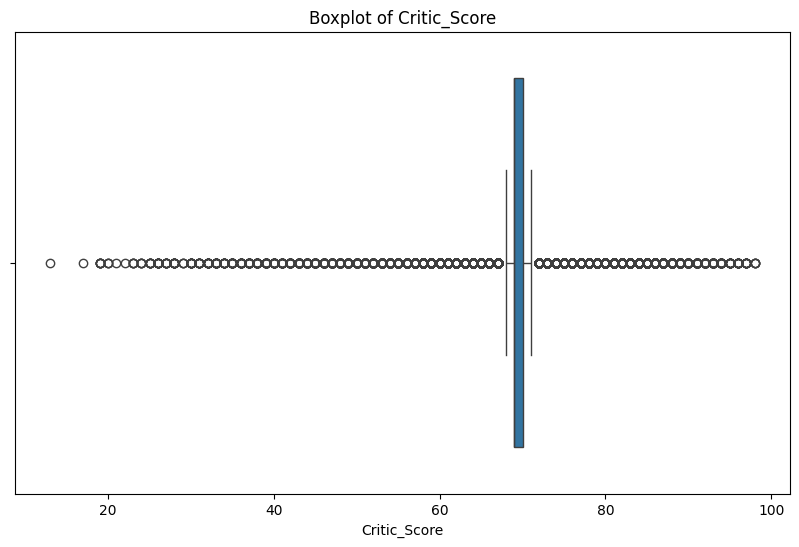

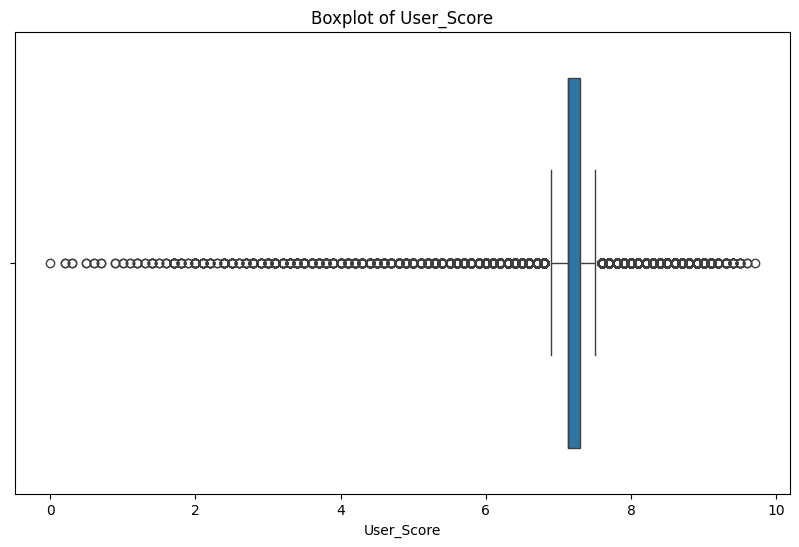

In [13]:
# Plot boxplot for 'NA_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['NA_Sales'])
plt.title('Boxplot of NA_Sales')
plt.show()

# Plot boxplot for 'EU_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['EU_Sales'])
plt.title('Boxplot of EU_Sales')
plt.show()

# Plot boxplot for 'JP_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['JP_Sales'])
plt.title('Boxplot of JP_Sales')
plt.show()

# Plot boxplot for 'Other_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Other_Sales'])
plt.title('Boxplot of Other_Sales')
plt.show()

# Plot boxplot for 'Global_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Global_Sales'])
plt.title('Boxplot of Global_Sales')
plt.show()

# Plot boxplot for 'Critic_Score'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Critic_Score'])
plt.title('Boxplot of Critic_Score')
plt.show()

# Plot boxplot for 'User_Score'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['User_Score'])
plt.title('Boxplot of User_Score')
plt.show()

In [14]:
df[(df['Global_Sales']  > 80)]
df.drop(0, inplace=True)



In [15]:
df[(df['Other_Sales']  > 10)]
df.drop(17,inplace=True)

In [16]:
df[(df['JP_Sales']  > 10)]
df.drop(4,inplace=True)

In [17]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.500000,431.000000,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908,Ubisoft,E
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908,Ubisoft,E


In [18]:
df_cat = df.select_dtypes(object)
df_cat

,Name,Platform,Genre,Publisher,Developer,Rating
1,Super Mario Bros.,NES,Platform,Nintendo,Ubisoft,E
2,Mario Kart Wii,Wii,Racing,Nintendo,Nintendo,E
3,Wii Sports Resort,Wii,Sports,Nintendo,Nintendo,E
5,Tetris,GB,Puzzle,Nintendo,Ubisoft,E
6,New Super Mario Bros.,DS,Platform,Nintendo,Nintendo,E
...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,Ubisoft,E
16715,LMA Manager 2007,X360,Sports,Codemasters,Ubisoft,E
16716,Haitaka no Psychedelica,PSV,Adventure,Idea Factory,Ubisoft,E
16717,Spirits & Spells,GBA,Platform,Wanadoo,Ubisoft,E


In [19]:
df_num = df.select_dtypes(['float64'])
df_num

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
1,1985.0,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000
5,1989.0,23.20,2.26,4.22,0.58,30.26,68.967679,26.360821,7.125046,162.229908
6,2006.0,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.500000,431.000000
...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908
16715,2006.0,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908
16716,2016.0,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908
16717,2003.0,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908


In [20]:
df_num.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,2006.489775,0.259590,0.142748,0.076762,0.046143,0.525498,68.965700,26.356138,7.124882,162.135045
std,5.829913,0.740618,0.446200,0.297353,0.154808,1.383023,9.722634,13.235108,1.010657,378.058836
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,68.967679,22.000000,7.125046,30.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.967679,26.360821,7.125046,162.229908
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.360821,7.300000,162.229908
max,2020.000000,29.080000,12.760000,7.200000,7.530000,40.240000,98.000000,113.000000,9.700000,10665.000000


In [21]:
#Apply log transformation to numerical columns 
columns_to_transform = ['NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']

# Adding a small constant (1e-10) to avoid log(0) issues
for col in columns_to_transform:
    df_num[col] = np.log(df_num[col] + 1e-10)

# Check the result
print(df_num[columns_to_transform].describe())

           NA_Sales      EU_Sales   Other_Sales  Global_Sales
count  16714.000000  16714.000000  16714.000000  16714.000000
mean      -7.628781     -9.777817    -11.184095     -1.754824
std        9.426613      9.816638      9.611815      1.462610
min      -23.025851    -23.025851    -23.025851     -4.605170
25%      -23.025851    -23.025851    -23.025851     -2.813411
50%       -2.525729     -3.912023     -4.605170     -1.771957
75%       -1.427116     -2.207275     -3.506558     -0.755023
max        3.370051      2.546315      2.018895      3.694862


In [22]:
for column in df_cat:
    le = LabelEncoder()
    df_cat[column] = le.fit_transform(df_cat[column])

<Axes: >

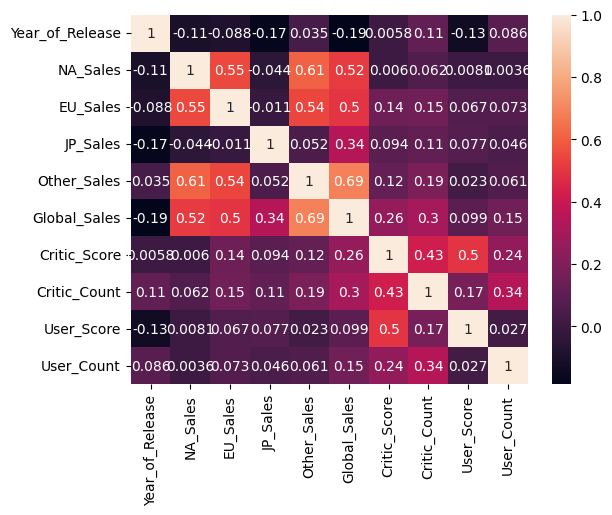

In [23]:
sns.heatmap(df_num.corr(), annot=True)

In [24]:
df_new = pd.concat([df_num, df_cat], axis=1)

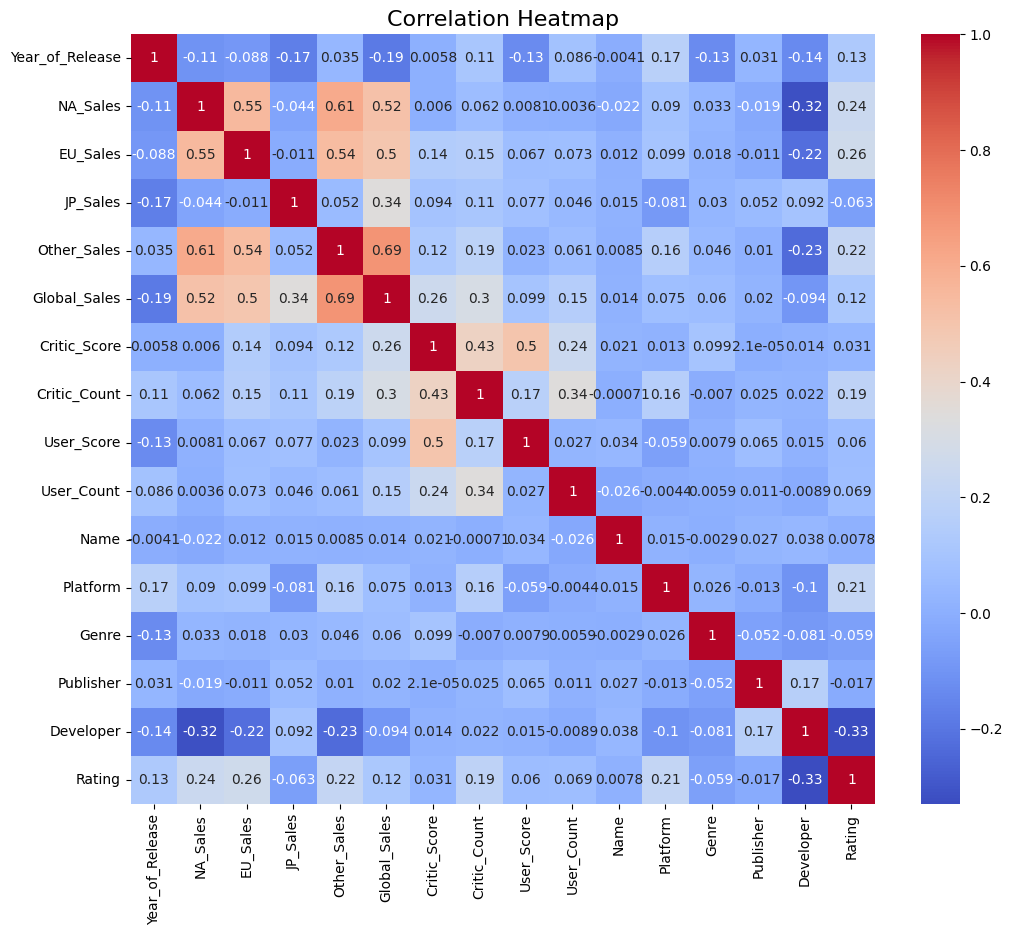

In [25]:
plt.figure(figsize=(12, 10))  
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')  
plt.title("Correlation Heatmap", fontsize=16)  
plt.show()

# CLUSTERING 

In [26]:
sales_data = df_num[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Normalize the data
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(sales_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sales_scaled)
    inertia.append(kmeans.inertia_)

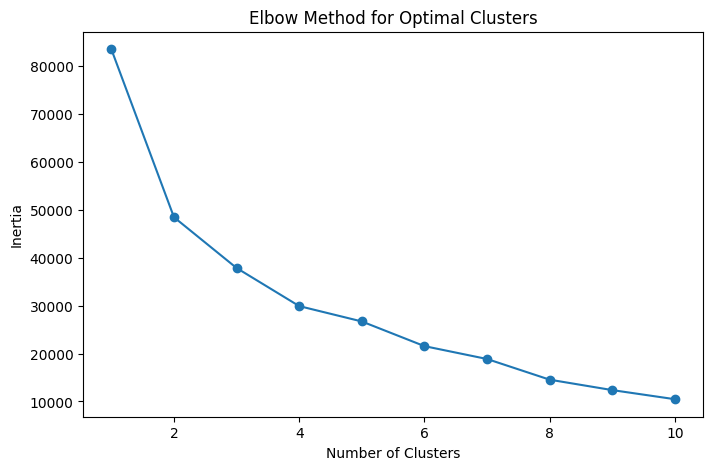

In [27]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(sales_scaled)
labels= kmeans.labels_

Text(0.5, 1.0, 'Clusters of Games Based on Sales (PCA)')

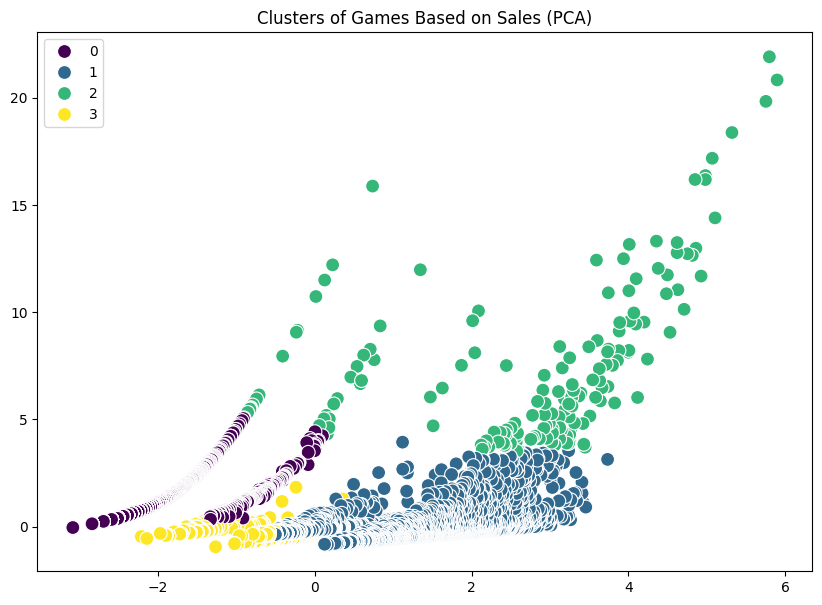

In [29]:
# Applying PCA to reduce to 2 components
pca = PCA(n_components=2)
sales_pca = pca.fit_transform(sales_scaled)
plt.figure(figsize=(10, 7))
sns.scatterplot( x=sales_pca[:,0], y=sales_pca[:,1], hue=labels, palette='viridis', s=100)
plt.title('Clusters of Games Based on Sales (PCA)')

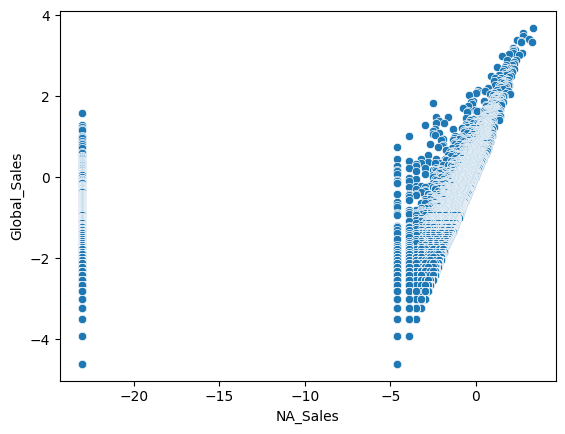

In [30]:

plt.figure()
sns.scatterplot(data=df_num,y='Global_Sales',x='NA_Sales')
plt.show()

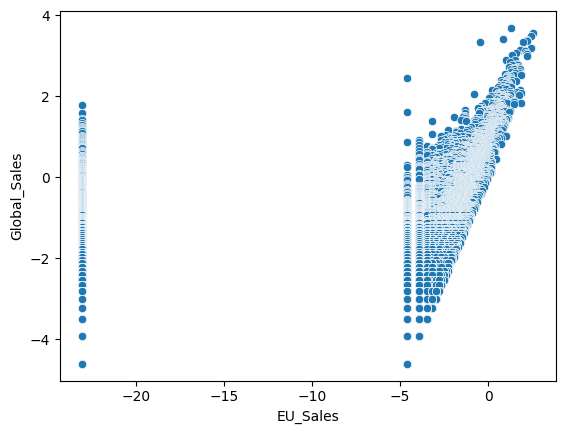

In [31]:
plt.figure()
sns.scatterplot(data=df_num,y='Global_Sales',x='EU_Sales')
plt.show()

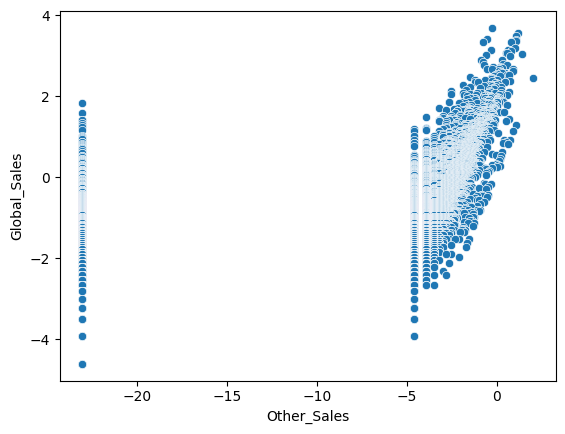

In [32]:
plt.figure()
sns.scatterplot(data=df_num,y='Global_Sales',x='Other_Sales')
plt.show()

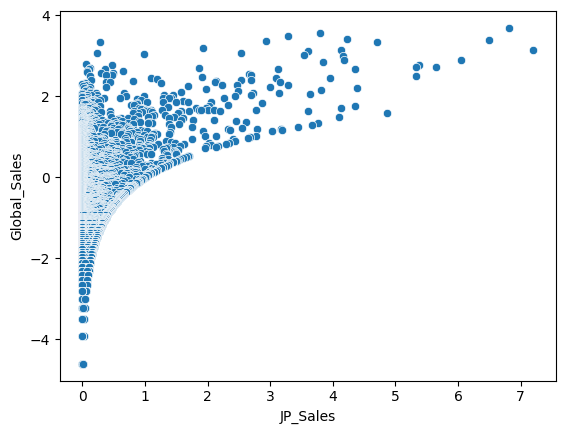

In [33]:
plt.figure()
sns.scatterplot(data=df_num,y='Global_Sales',x='JP_Sales')
plt.show()

# Regression

In [34]:
X= df_num[["NA_Sales","EU_Sales","Other_Sales","JP_Sales"]]
y= df_num["Global_Sales"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state = 1)

In [36]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred= lr.predict(X_train)

In [38]:
#Checking for overfitting 
r2_score(y_train, y_pred)

0.6058140684504245

In [39]:
y_pred =lr.predict(X_test)

In [40]:
print("MSE=" ,mean_squared_error(y_test,y_pred))

print("MAE=", mean_absolute_error(y_test,y_pred))
print("R2 Score=", r2_score(y_test,y_pred))

MSE= 0.8633357730790534
MAE= 0.7442764315923288
R2 Score= 0.5992423138903051


In [41]:
pf = PolynomialFeatures(3)

In [42]:
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)

In [43]:
lr= LinearRegression()

In [44]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [45]:
y_pred= lr.predict(X_test_poly)

In [46]:
print("MSE=" ,mean_squared_error(y_test,y_pred))
print("MAE=", mean_absolute_error(y_test,y_pred))
print("R2 Score=", r2_score(y_test,y_pred))

MSE= 0.10398092326606033
MAE= 0.1993760510783007
R2 Score= 0.9517323902158745


### Applying Random Forest Regressor

In [47]:
X = df_num[['EU_Sales', 'NA_Sales',  'Other_Sales','JP_Sales']]  
y = df_num['Global_Sales']                                       

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Initializing the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
y_pred= rf.predict(X_train)
r2_score(y_train, y_pred)

0.9967440021314747

In [54]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [55]:
print("MSE=" ,mean_squared_error(y_test,y_pred))
print("MAE=", mean_absolute_error(y_test,y_pred))
print("R2 Score=", r2_score(y_test,y_pred))

MSE= 0.01348474259032451
MAE= 0.04571669918642057
R2 Score= 0.993720479475932


### With a good R2 Score the model has improved and now has a score of 0.99 

In [2]:
n=5
factorial=1

for i in range(1,n+1):
    factorial=factorial*i
    
print(factorial)

120
